## Parte 1: Exploratória
## Goal 7 - Garantir o acesso a energia acessível, confiável, sustentável e moderna para todos
O objetivo de desenvolvimento sustentável escolhido foi o 7, que diz garantir o acesso a energia acessível, confiável, sustentável e moderna para todos. A eletricidade é algo básico para inserção no mundo moderno e tão essencial no dia a dia, incomparável com qualquer outra invenção, considerando até que a revolução tecnológica só foi possível por conta de sua da presença. 
Algo indispensável em nossas vidas, estando presente desde a iluminação, aquecimento, fins médicos, uso de eletrodomésticos, computadores, até sistemas de transporte público e muitos outros.
O número de pessoas sem acesso a eletricidade foi um fator que chamou atenção, o que levou ao indicador escolhido, o acesso a energia elétrica. O objetivo é diretamente relacionado ao indicador uma vez que o próprio objetivo é garantir o acesso de todos a energia confiável, sustentável e moderna.
A seguir, segue a análise realizada, utilizando os dados do World Bank (https://databank.worldbank.org/source/sustainable-energy-for-all#) com base em 3 países, a saber, Brasil, Alemanha e Moçambique.

In [775]:
import pandas as pd

# df = pd.read_csv('dados/SDG_csv/'+ 'SDGData' +'.CSV', sep=',', encoding='UTF-8', decimal='.', skiprows=0)
df = pd.read_csv('dados/Data_Extract_From_Sustainable_Energy_for_All/'+ '6d90deca-5693-43c3-8e1f-664a61b7c0db_Data' +'.csv', sep=',', encoding='UTF-8', decimal='.', skiprows=0)
df.head()

,Country Name,Country Code,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
0,Brazil,BRA,1997.0,YR1997,..,68.817801,93.354139,99.056926,3.94084953998611,286355,92.9778363670604,2405843,43.7251083730704,307982,5502200.199192
1,Brazil,BRA,1998.0,YR1998,..,72.778247,94.193812,99.137016,4.0217825990965,298979,92.9233437348484,2491751,43.8615767414815,321748,5680942.604244
2,Brazil,BRA,1999.0,YR1999,..,75.436121,94.762960,99.186252,4.09373895058941,301368,90.0369268275195,2559594,44.0972758704006,334716,5804426.576196
3,Brazil,BRA,2000.0,YR2000,86.91,74.9041610654805,94.466568,98.998169,3.94784572124322,312249,89.4927058553782,2504059,42.7987739937361,348910,5850772.735608
4,Brazil,BRA,2001.0,YR2001,87.89,77.62953,96.016528,99.215119,3.9512174689924,276891,84.2874450546105,2428426,41.4778788144924,328508,5854749.73506


In [776]:
df = df[['Country Name', 'Time', 'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]']]
df = df.rename({'Country Name' : 'Nome do país', 'Time' : 'Ano', 'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]' : 'Acesso à eletricidade (%)'}, axis='columns')
df.head()

,Nome do país,Ano,Acesso à eletricidade (%)
0,Brazil,1997.0,93.354139
1,Brazil,1998.0,94.193812
2,Brazil,1999.0,94.762960
3,Brazil,2000.0,94.466568
4,Brazil,2001.0,96.016528


In [777]:
df_bra = df.iloc[range(0,20)]
df_ger = df.iloc[range(20,40)]
df_moz = df.iloc[range(40,60)]


In [778]:
df_bra = df_bra[['Ano', 'Acesso à eletricidade (%)']]
df_bra = df_bra.rename({'Acesso à eletricidade (%)' : 'Acesso à eletricidade no Brasil (%)'}, axis='columns')

df_ger = df_ger[['Ano', 'Acesso à eletricidade (%)']]
df_ger = df_ger.rename({'Acesso à eletricidade (%)' : 'Acesso à eletricidade na Alemanha (%)'}, axis='columns')

df_moz = df_moz[['Ano', 'Acesso à eletricidade (%)']]
df_moz = df_moz.rename({'Acesso à eletricidade (%)' : 'Acesso à eletricidade em Moçambique (%)'}, axis='columns')

In [779]:
## https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
df = df_bra.merge(df_ger,on='Ano').merge(df_moz,on='Ano')
df.head()

,Ano,Acesso à eletricidade no Brasil (%),Acesso à eletricidade na Alemanha (%),Acesso à eletricidade em Moçambique (%)
0,1997.0,93.354139,100.0,6.600000
1,1998.0,94.193812,100.0,4.548946
2,1999.0,94.762960,100.0,5.633479
3,2000.0,94.466568,100.0,6.695059
4,2001.0,96.016528,100.0,5.700000


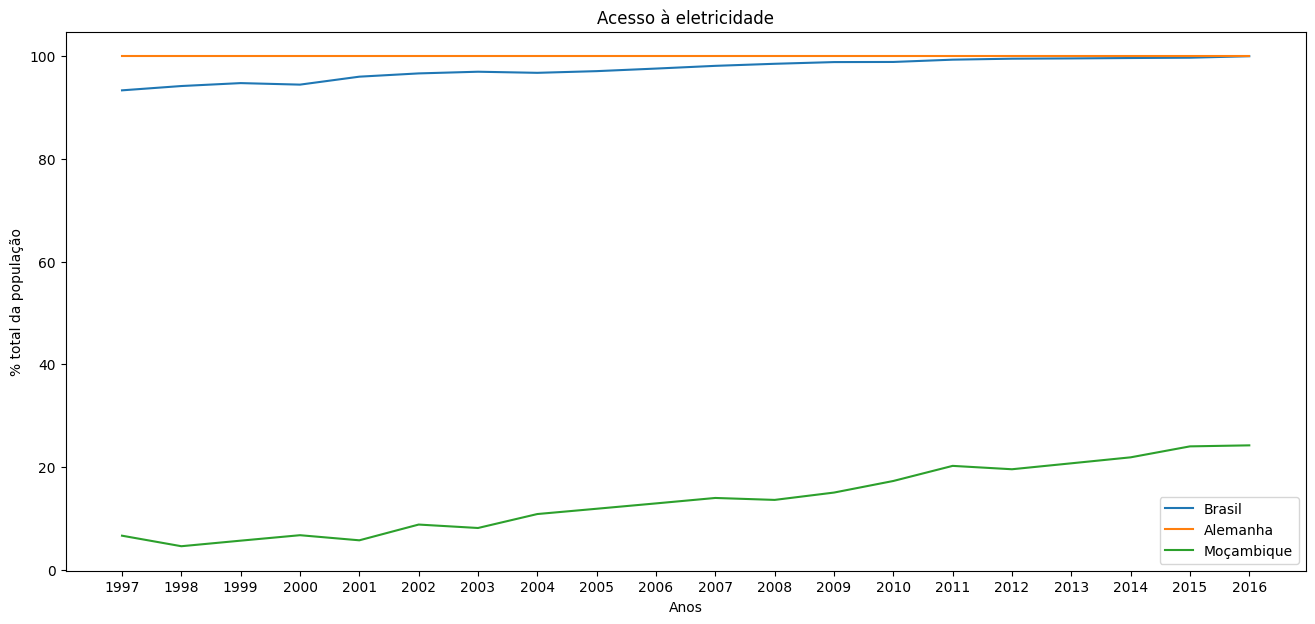

In [780]:
import matplotlib.pyplot as plt
# import seaborn as sns

plt.style.use('default')
plt.figure(figsize=(16,7))

plt.plot(df['Ano'], df['Acesso à eletricidade no Brasil (%)'])
plt.plot(df['Ano'], df['Acesso à eletricidade na Alemanha (%)'])
plt.plot(df['Ano'] ,df['Acesso à eletricidade em Moçambique (%)'])

plt.xticks(df['Ano'])
plt.legend(['Brasil', 'Alemanha', 'Moçambique'])
plt.xlabel('Ano')
plt.ylabel('% total da população')
plt.title('Acesso à eletricidade')
plt.xlabel('Anos')
plt.show()

In [781]:
df = df.set_index(df['Ano'])
df = df[ ['Acesso à eletricidade no Brasil (%)', 'Acesso à eletricidade na Alemanha (%)', 'Acesso à eletricidade em Moçambique (%)'] ]
df.head()

,Acesso à eletricidade no Brasil (%),Acesso à eletricidade na Alemanha (%),Acesso à eletricidade em Moçambique (%)
Ano,,,
1997.0,93.354139,100.0,6.600000
1998.0,94.193812,100.0,4.548946
1999.0,94.762960,100.0,5.633479
2000.0,94.466568,100.0,6.695059
2001.0,96.016528,100.0,5.700000


## Parte 2: Correlações 
O indicador escolhido foi a mortalidade de crianças de até 5 anos. Como hipótese temos, que quanto maior o número de pessoas com acesso a eletricidade, memor será a taxa de mortalidade. 


In [782]:
# APS_cdados_Insper\dados\Data_Extract_From_Sustainable_Development_Goals_(SDGs)\e8792a52-f69a-48e7-a403-715479382981_Data.csv
saude = pd.read_csv('dados/Data_Extract_From_Sustainable_Development_Goals_(SDGs)/'+ 'e8792a52-f69a-48e7-a403-715479382981_Data' +'.csv', sep=',', encoding='UTF-8', decimal='.', skiprows=0)
saude.head()

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Brazil,BRA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,68,69,70,71,71,72,...,61,60,61,62,63,62,60,..,..,..
1,Brazil,BRA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,32.5,30.4,28.4,26.5,24.8,23.2,...,17.9,17.2,16.7,16.3,15.9,16.7,15.4,15.2,14.9,14.7
2,Brazil,BRA,"Mortality rate, neonatal (per 1,000 live births)",SH.DYN.NMRT,17.6,16.7,15.8,15,14.2,13.5,...,10.7,10.3,10,9.7,9.5,10,9.3,9.2,8.9,8.7
3,Brazil,BRA,Number of people spending more than 10% of hou...,SH.UHC.OOPC.10.TO,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Brazil,BRA,Proportion of population spending more than 10...,SH.UHC.OOPC.10.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,11.8118953704834,..,..,..


In [783]:
saude = saude[ saude['Series Name'] == 'Mortality rate, under-5 (per 1,000 live births)']
saude_bra = saude[ saude['Country Name'] == 'Brazil' ]

saude_ger = saude[ saude['Country Name'] == 'Germany' ]

saude_moz = saude[ saude['Country Name'] == 'Mozambique' ]


In [784]:
saude_bra = saude_bra.T
saude_ger = saude_ger.T
saude_moz = saude_moz.T



In [785]:
saude_bra = saude_bra.iloc[4:]
saude_ger = saude_ger.iloc[4:]
saude_moz = saude_moz.iloc[4:]


In [786]:
saude_bra = saude_bra.rename({1 : 'Taxa de mortalidade até 5 anos, no Brasil'}, axis='columns')
saude_ger = saude_ger.rename({8 : 'Taxa de mortalidade até 5 anos, na Alemanha'}, axis='columns')
saude_moz = saude_moz.rename({15 : 'Taxa de mortalidade até 5 anos, em Moçambique'}, axis='columns')


In [787]:
df_saude = pd.concat((saude_bra, saude_ger, saude_moz), join='outer', axis=1)

df_saude.tail()

,"Taxa de mortalidade até 5 anos, no Brasil","Taxa de mortalidade até 5 anos, na Alemanha","Taxa de mortalidade até 5 anos, em Moçambique"
2016 [YR2016],16.7,3.9,80.4
2017 [YR2017],15.4,3.9,78
2018 [YR2018],15.2,3.8,75.6
2019 [YR2019],14.9,3.7,72.9
2020 [YR2020],14.7,3.7,70.6


In [788]:
anos = pd.Series(list(range(2001, 2021)))
df_saude = df_saude.set_index(anos)

df_saude.tail()

,"Taxa de mortalidade até 5 anos, no Brasil","Taxa de mortalidade até 5 anos, na Alemanha","Taxa de mortalidade até 5 anos, em Moçambique"
2016,16.7,3.9,80.4
2017,15.4,3.9,78
2018,15.2,3.8,75.6
2019,14.9,3.7,72.9
2020,14.7,3.7,70.6


In [789]:
df_saude['Taxa de mortalidade até 5 anos, no Brasil'] = pd.to_numeric(df_saude['Taxa de mortalidade até 5 anos, no Brasil'])
df_saude['Taxa de mortalidade até 5 anos, na Alemanha'] = pd.to_numeric(df_saude['Taxa de mortalidade até 5 anos, na Alemanha'])
df_saude['Taxa de mortalidade até 5 anos, em Moçambique'] = pd.to_numeric(df_saude['Taxa de mortalidade até 5 anos, em Moçambique'])


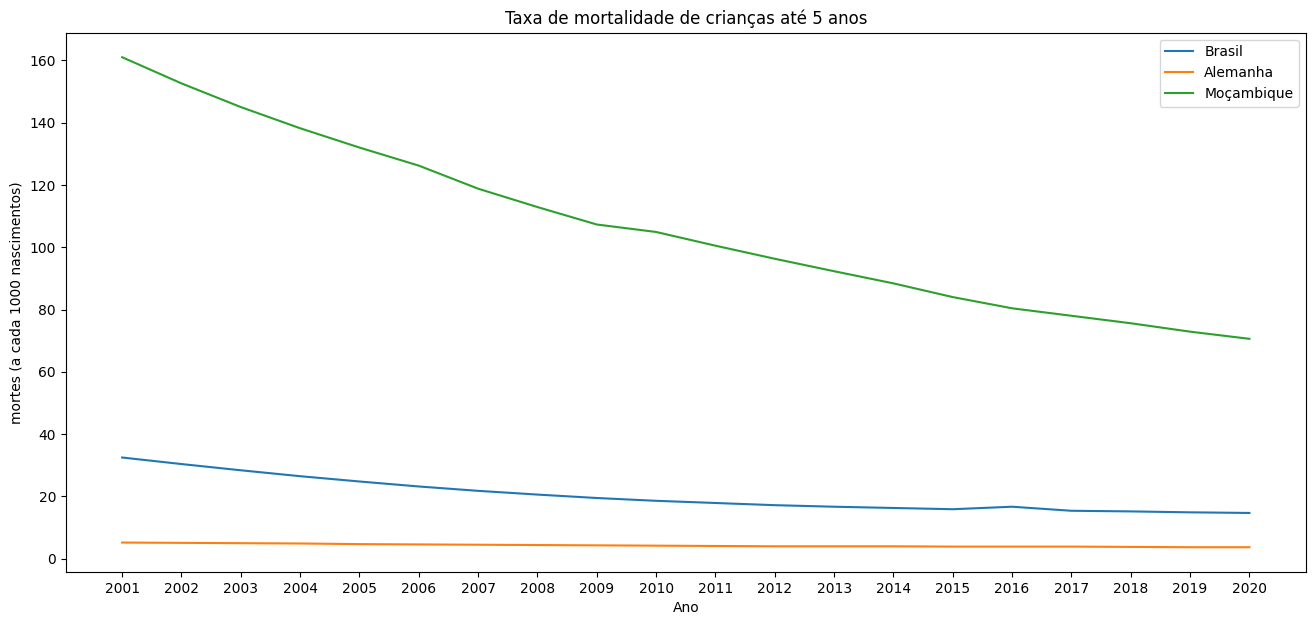

In [790]:
plt.style.use('default')
plt.figure(figsize=(16,7))

plt.plot(df_saude['Taxa de mortalidade até 5 anos, no Brasil'])
plt.plot(df_saude['Taxa de mortalidade até 5 anos, na Alemanha'])
plt.plot(df_saude['Taxa de mortalidade até 5 anos, em Moçambique'])

plt.xticks(df_saude.index)
plt.legend(['Brasil', 'Alemanha', 'Moçambique'])
plt.xlabel('Ano')
plt.ylabel('mortes (a cada 1000 nascimentos)')
plt.title('Taxa de mortalidade de crianças até 5 anos')
plt.show()

### Comparação dos gráficos (da parte 1 e parte 2)

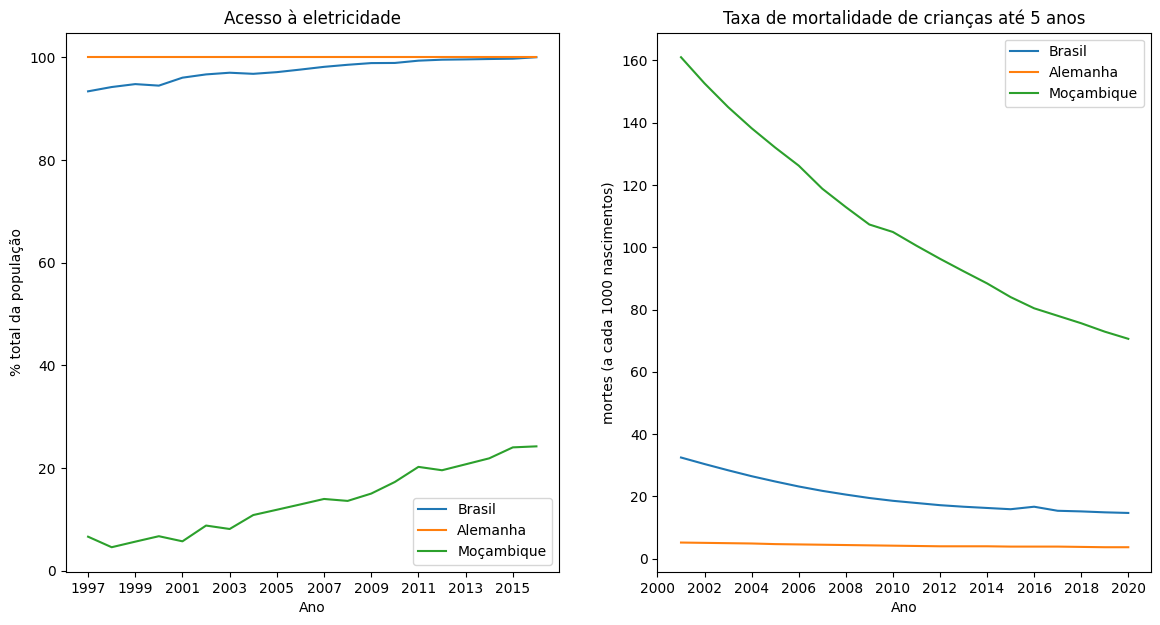

In [791]:
plt.style.use('default')
plt.figure(figsize=(14,7))
anos_saude = list(range(2000, 2021, 2))
anos_eletricidade = list(range(1997, 2017, 2))


plt.subplot(1, 2, 1)

plt.plot(df['Acesso à eletricidade no Brasil (%)'])
plt.plot(df['Acesso à eletricidade na Alemanha (%)'])
plt.plot(df['Acesso à eletricidade em Moçambique (%)'])

plt.xticks(anos_eletricidade)
plt.legend(['Brasil', 'Alemanha', 'Moçambique'])
plt.xlabel('Ano')
plt.ylabel('% total da população')
plt.title('Acesso à eletricidade')
plt.xlabel('Ano')

plt.subplot(1, 2, 2)

plt.plot(df_saude['Taxa de mortalidade até 5 anos, no Brasil'])
plt.plot(df_saude['Taxa de mortalidade até 5 anos, na Alemanha'])
plt.plot(df_saude['Taxa de mortalidade até 5 anos, em Moçambique'])

plt.xticks(anos_saude)
plt.legend(['Brasil', 'Alemanha', 'Moçambique'])
plt.xlabel('Ano')
plt.ylabel('mortes (a cada 1000 nascimentos)')
plt.title('Taxa de mortalidade de crianças até 5 anos')

plt.show()

### Correlação e Covariância entre os dados

In [792]:
df_cor_moz = pd.concat( (df['Acesso à eletricidade em Moçambique (%)'], df_saude['Taxa de mortalidade até 5 anos, em Moçambique']), join='inner', axis = 1)
df_cor_bra = pd.concat( (df['Acesso à eletricidade no Brasil (%)'], df_saude['Taxa de mortalidade até 5 anos, no Brasil']), join='inner', axis = 1)
df_cor_ger = pd.concat( (df['Acesso à eletricidade na Alemanha (%)'], df_saude['Taxa de mortalidade até 5 anos, na Alemanha']), join='inner', axis = 1)

df_cor_ger.head()
# sda_ = pd.concat((sda1, sda2), join='outer', axis=1)
# sda_.head()


,Acesso à eletricidade na Alemanha (%),"Taxa de mortalidade até 5 anos, na Alemanha"
2001.0,100.0,5.2
2002.0,100.0,5.1
2003.0,100.0,5.0
2004.0,100.0,4.9
2005.0,100.0,4.7


##### Correlação e covariância em Moçambique

In [793]:
## correlação
corr_moz = df_cor_moz.corr()
corr_moz

,Acesso à eletricidade em Moçambique (%),"Taxa de mortalidade até 5 anos, em Moçambique"
Acesso à eletricidade em Moçambique (%),1.000000,-0.978918
"Taxa de mortalidade até 5 anos, em Moçambique",-0.978918,1.000000


In [794]:
## covariância
cov_moz = df_cor_moz.cov()
cov_moz

,Acesso à eletricidade em Moçambique (%),"Taxa de mortalidade até 5 anos, em Moçambique"
Acesso à eletricidade em Moçambique (%),33.435441,-142.477401
"Taxa de mortalidade até 5 anos, em Moçambique",-142.477401,633.566667


##### Correlação e covariância no Brasil

In [795]:
corr_bra = df_cor_bra.corr()
corr_bra

,Acesso à eletricidade no Brasil (%),"Taxa de mortalidade até 5 anos, no Brasil"
Acesso à eletricidade no Brasil (%),1.00000,-0.97667
"Taxa de mortalidade até 5 anos, no Brasil",-0.97667,1.00000


In [796]:
cov_bra = df_cor_bra.cov()
cov_bra

,Acesso à eletricidade no Brasil (%),"Taxa de mortalidade até 5 anos, no Brasil"
Acesso à eletricidade no Brasil (%),1.704756,-6.869365
"Taxa de mortalidade até 5 anos, no Brasil",-6.869365,29.018500


##### Correlação e covariância na Alemanha

In [797]:
corr_ger = df_cor_ger.corr()
corr_ger

,Acesso à eletricidade na Alemanha (%),"Taxa de mortalidade até 5 anos, na Alemanha"
Acesso à eletricidade na Alemanha (%),NaN,NaN
"Taxa de mortalidade até 5 anos, na Alemanha",NaN,1.0


In [798]:
cov_ger = df_cor_ger.cov()
cov_ger

,Acesso à eletricidade na Alemanha (%),"Taxa de mortalidade até 5 anos, na Alemanha"
Acesso à eletricidade na Alemanha (%),0.0,0.000000
"Taxa de mortalidade até 5 anos, na Alemanha",0.0,0.199333


Espera-se que os dois indicadores estejam relacionados, uma vez que a falta de acesso a energia podem causar problemas a saúde, desde o armazenamento de alimentos refrigerados, até uso de fogão a lenha, que de acordo com a ONU, leva a milhões de mortes por ano devido a produção de fumaça. Podemos ter como exemplo concreto, o projeto de lei que foi aprovado (Projeto de Lei 3579/20), que diz que a inclusão do acesso à energia elétrica como item fundamental para promoção da saúde. E apresentam que a falta de energia, leva ao uso de fontes de energia poluentes, que causam e agravam doenças respiratórias, além da liberação de gases que promovem a liberação de gases do efeito estufa.  

Ao analisar a correlação entre os indicadores, os valores apresentados indicam forte correlação inversa, ou seja, os dois estão próximos de um comportamento inversamente proporcional no período considerado, para Moçambique e Brasil (correlção de -0,97). Por outro lado, não foi possível determinar a correlação no caso da Alemanha, tendo em vista que o acesso a energia elétrica não variou durante todo o período considerado (manteve-se em 100%). Isso indica que investimento em infraestrutura (como políticas de acesso a energia elétrica) podem ser efetivas para diminuição da mortalidade infantil em Moçambique e até no Brasil, porém o mesmo não é válido para Alemanha. Desse modo, uma hipótese que pode ser levantada é que, em países em desenvolvimento, a falta de infraestrutura pode ser um fator relevante na taxa de mortalidade, porém, nos países desenvolvidos, investimentos em infraestrutura tem influência irrisória na taxa de mortalidade.


Referência bibliográfica
- https://brasil.un.org/pt-br/130381-acesso-eletricidade-avanca-mas-desigualdade-ainda-e-obstaculo-para-cumprir-meta-de-energia
- https://www.camara.leg.br/noticias/809883-comissao-aprova-inclusao-do-acesso-a-energia-eletrica-como-item-fundamental-para-promocao-da-saude/

Modificação feitas na entrega anterior:


- Nomes nos eixos:	
Título adicionado aos eixos, bem como adequação do título do gráfico para evitar redundância.

## Parte 3: Distribuições
#### Enunciado
Desde o começo dos anos 1990, vários países têm se agrupado em blocos de interesse comum, como a União Européia e o Mercosul. Os blocos econômicos são grupos de países que decidem reduzir suas restrições para comércio, financiamento ou trânsito de pessoas entre si, numa tentativa de incentivar suas economias e ao mesmo tempo protegê-las de competições desiguais. Nesta etapa, faremos a análise de blocos econômicos frente aos indicadores que escolhemos.

1. Escolha dois blocos econômicos (por exemplo, Mercosul, União Européia, BRICS, OPEP, etc.). Pesquise para entender quais foram os critérios para a criação do bloco (proximidade geográfica? Proximidade econômica? Proximidade cultural? Outro?) e quais foram as aberturas providas pelo bloco (isenção de impostos? trânsito de pessoas? acesso a financiamentos? outro?)
2. Em cada um dos países dos blocos, verifique se deveriam ser classificados como “avançado” ou “atrasado” em relação ao indicador que você escolheu no ítem 1. Defina claramente qual foi seu critério para esta separação!
3. Para cada bloco, estime a probabilidade de um país daquele bloco ser avançado, isto é, P(avançado|bloco).
4. Usando o Teorema de Bayes, estime, para cada bloco, P(bloco|avançado).
5. Projete um pequeno sistema que classifica países como participantes de algum bloco à partir da informação de eles serem avançados ou não no indicador que foi escolhido.
6. Conclua: o indicador que você escolheu é um bom preditor para o bloco econômico?

Os blocos econômicos escolhidos foram BRICS e OPEP.   
   
BRICS:   
	O BRICS é um bloco formado por países de economia emergente, símbolo de alteração no cenário geopolítico de domínio das nações do G7. O termo inicialmente nasceu do acrônimo BRIC (Brasil, Rússia, Índia e China) criado pelo banco Goldman Sachs em um estudo de 2001 intitulado "Building Better Global Economic BRICs". A partir desse ponto, os países do BRIC passaram a realizar reuniões estratégicas para estreitar laços políticos e econômicos, porém sem a realização de acordos de incentivos econômicos (como ocorre no Mercosul, EU, Nafta, entre outros), de modo que, não é considerado um bloco econômico. A partir de 2011 a África do Sul passou a fazer parte do bloco, passando ao termo BRICS como é conhecido hoje. 
	Apesar de não serem considerados um bloco econômico, os países apresentam grandes relações comerciais entre si, um exemplo é a relação de Brasil e China, pois a China é o maior parceiro comercial do Brasil. Outro ponto relevante são as medidas que o grupo de países performou nos últimos anos, como a criação de um contingente de reserva no valor de 100 bilhões de dólares ou mesmo o banco dos BRICS, a fim de manter a estabilidade econômica dos países do bloco.   

OPEP:   
	A Organização dos Países Exportadores de Petróleo (OPEP) é uma organização intergovernamental de 13 nações, fundada em 15 de setembro de 1960 em Bagdá pelos cinco membros fundadores (Irã, Iraque, Kuwait, Arábia Saudita e Venezuela), com sede desde 1965 em Viena, na Áustria, com a finalidade de se opor aos interesses das empresas que dominavam o mercado, conhecidas como “Sete Irmãs” e exigiam cada vez mais uma redução no preço da comoditie. Em setembro de 2018, os então 14 países membros representavam 44% da produção global de petróleo e 81,5% das reservas de petróleo "comprovadas" do mundo, dando à OPEP uma grande influência nos preços globais de petróleo.[3]   
A missão declarada da organização é coordenar e unificar as políticas de petróleo de seus países membros e garantir a estabilização dos mercados de petróleo. A atuação do bloco é semelhante à de um cartel a fim de reduzir a concorrência no mercado. Um exemplo recente dessa política foi a decisão do bloco de reduzir a produção de barris de petróleo (em 2 milhões de barris por dia), a fim de diminuir a oferta implicando no aumento dos preços. [4]   
Fontes:    
[1]https://pt.wikipedia.org/wiki/BRICS   
[2]https://brasilescola.uol.com.br/geografia/bric.htm
[3]https://pt.wikipedia.org/wiki/Organiza%C3%A7%C3%A3o_dos_Pa%C3%ADses_Exportadores_de_Petr%C3%B3leo
[4]https://economia.uol.com.br/noticias/rfi/2022/10/05/opep-reduz-producao-de-petroleo-em-2-milhoes-de-barris-e-precos-devem-aumentar.htm


Para determinar se o país está avançado em relação ao indicador em questão (acesso de eletricidade à população), foi realizada uma análise nos gráficos disponibilizados no world bank data, disponível em: https://datatopics.worldbank.org/sdgs/index.html. 
A primeira pesquisa foi a do gráfico com a média mundial, seguida de percentis definidos como "Income groups". A seguir estão disponilizados os gráficos utilizados na pesquisa.   

![WORLD](imagens/acess_to_eletricity_worldVsBrazil.png)

![IncomeGroups](imagens/acess_to_eletricity_incomeGroupsVsBrazil.png)   

A partir da análise, pode-se perceber que há uma grande concentração de países com valores próximos de 100% de acesso a energia em 2020, tendo em vista que tanto o "High Income" está em 100% e o "Upper middle Income" em 99,37%. A comparação da média mundial com o "Lower middle Income", ambos com 90%, indica que a maior parte dos países tem uma porcentagem superior a 90%, implicando que os países com menores valores, os de "Low Income", apresentam valores tão discrepantes dos demais que intereferem de modo significativo na média. 
Outro fator de interesse foi a taxa de crescimento. Evidencia-se certa constância (gráficos com comportamento próximo do linear) nos gráficos apresentados. Caso a tendência de 2010 à 2020 se mantivesse os países do "Lower middle income" alcançariam os 100% antes de 2030 (em meados de 2026). Obviamente não é uma expectativa razoável, tendo em vista que a população remanescente sem acesso a energia (os últimos 10%) requisitarão maiores custos e apresentam menos interesse econômico por parte dos governos e empresas. Porém parece r
Com essas informações em mente e levando em conta que, para que o objetivo 7 seja concretizado esse indicador (acesso a eletricidade) deve estar bem próximo de 100%, foi considerado que um país está avançado nesse indicador se apresentar um valor acima de 94%, tendo em vista que esses países apresentam boas perpectivas de alcançar o objetivo da ONU.

In [799]:
df = pd.read_csv('dados/parte3/Data_Extract_From_World_Development_Indicators/'+ '879dc548-ab69-4b4d-89bf-7c7ea032c3bd_Data' +'.csv', sep=',', encoding='UTF-8', decimal='.', skiprows=0)
anos = {}
for i in range(2002, 2022):
    anos[f'{i} [YR{i}]'] = i
df = df.rename({'Country Name' : 'Nome do país'}, axis='columns')
df = df.rename(anos, axis='columns')
df.head()

,Nome do país,Country Code,Series Name,Series Code,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Brazil,BRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,96.652992,96.980095,96.765106,97.093513,97.594315,98.125381,...,99.519493,99.575150,99.650246,99.710899,99.699997,99.800003,99.699997,99.800003,100.000000,..
1,Brazil,BRA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,30.400000,28.400000,26.500000,24.800000,23.200000,21.800000,...,17.200000,16.700000,16.300000,15.900000,16.700000,15.400000,15.200000,14.900000,14.700000,..
2,Germany,DEU,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,..
3,Germany,DEU,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,5.100000,5.000000,4.900000,4.700000,4.600000,4.500000,...,4.000000,4.000000,4.000000,3.900000,3.900000,3.900000,3.800000,3.700000,3.700000,..
4,Mozambique,MOZ,Access to electricity (% of population),EG.ELC.ACCS.ZS,8.443921,8.100000,10.770590,11.931945,13.095172,12.400000,...,21.232607,22.420128,24.799999,24.000000,26.246521,24.299999,31.100000,29.674450,30.603832,..


In [800]:
df = df[ df['Series Name'] == 'Access to electricity (% of population)']
anos = list(range(2002, 2021))
anos = ['Nome do país'] + anos
df = df[anos]

lista_brics = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa' ]
brics = df[ df['Nome do país'].isin(lista_brics) ]

opep = df[ ~df['Nome do país'].isin(lista_brics + ['Germany', 'Mozambique'])]


In [801]:
brics.head()

,Nome do país,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,96.652992,96.980095,96.765106,97.093513,97.594315,98.125381,98.526627,98.856941,98.599998,99.328690,99.519493,99.575150,99.650246,99.710899,99.699997,99.800003,99.699997,99.800003,100.000000
32,China,97.516205,97.754379,97.989670,98.224426,98.461052,98.702202,98.950577,99.208900,99.699997,99.848724,99.961929,99.996445,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
34,India,62.299999,64.047485,64.400002,67.579811,67.900002,71.119865,72.899384,75.000000,76.300003,67.599998,79.900002,81.999329,83.872498,88.000000,89.217796,92.124947,95.699997,97.308266,99.000000
36,Russian Federation,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.500000,100.000000,100.000000,100.000000,100.000000,100.000000
38,South Africa,76.699997,78.800003,80.900002,80.800003,80.699997,82.000000,81.900002,82.599998,82.900002,83.599998,85.300003,85.199997,85.900002,85.300003,83.900002,84.400002,84.699997,85.000000,84.385536


In [802]:
brics = brics.set_index('Nome do país')
opep = opep.set_index('Nome do país')


In [803]:
brics = brics.transpose()
opep = opep.transpose()


Antes de realizar as análises, decidi plotar os gráficos, para buscar possíveis inconsistências (dados faltantes ou situações inesperadas) nos dados.

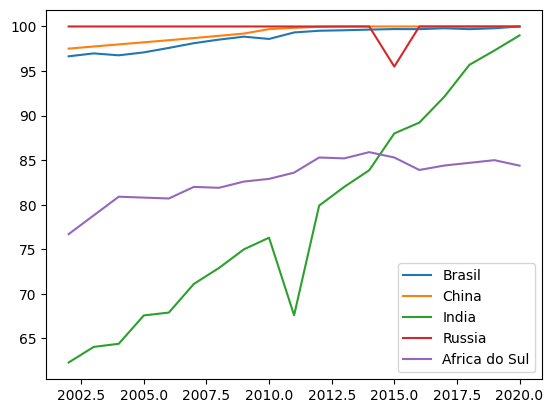

In [804]:
plt.figure()
plt.plot(brics)
plt.legend(['Brasil', 'China', 'India', 'Russia', 'Africa do Sul'])
plt.show()

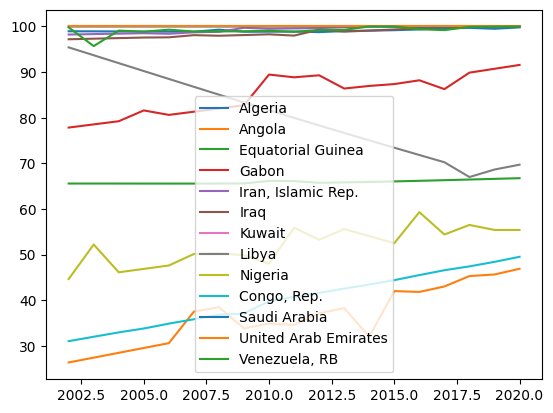

In [805]:
plt.figure()
plt.plot(opep)
plt.legend(list(opep.columns))
plt.show()

Considerando-se os dados de 2020, foram realizadas as análises de "avançaddo" ou não em relação ao indicador em questão "Acesso à eletricidade", com o critério de mais de 94% da população com acesso para estar qualificado como avançado.
  

In [806]:
brics2020 = list(brics.loc[2020])
opep2020 = list(opep.loc[2020])

In [807]:
opep_avan = [float(i) > 94.0 for i in opep2020]
k_opep = opep_avan.count(True)
n_opep = len(opep_avan)


In [808]:
brics_avan = [float(i) > 94.0 for i in brics2020]
k_brics = brics_avan.count(True)
n_brics = len(brics_avan)

In [809]:
n = (n_opep + n_brics)
p_opep = n_opep/n
p_brics = n_brics/n

p_avan = (k_brics+k_opep)/n

In [810]:
p_avan_opep = k_opep/n_opep
p_opep_avan = p_avan_opep * p_opep / p_avan

In [811]:
p_avan_brics = k_brics/n_brics
p_brics_avan = p_avan_brics * p_brics / p_avan

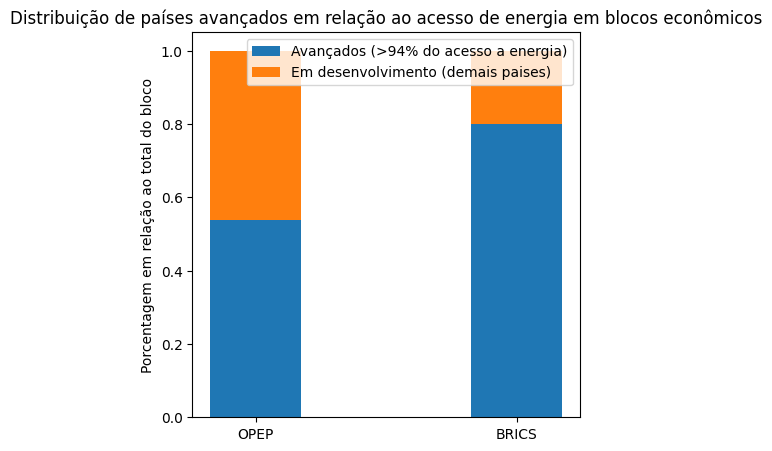

In [812]:
import numpy as np
## codigo adaptado de: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
N = 2
avan_plot = (k_opep/n_opep, k_brics/n_brics)
n_avan_plot = ((n_opep - k_opep)/(n_opep), (n_brics - k_brics)/(n_brics))
# brics_plot = (k_brics, n_brics - k_brics)
# opep_plot = (k_opep, n_opep - k_opep)
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(5, 5))
p1 = plt.bar(ind, avan_plot, width)
p2 = plt.bar(ind, n_avan_plot, width, bottom = avan_plot)
 
plt.ylabel('Porcentagem em relação ao total do bloco')
plt.title('Distribuição de países avançados em relação ao acesso de energia em blocos econômicos')
plt.xticks(ind, ('OPEP', 'BRICS'))
plt.legend((p1[0], p2[0]), ('Avançados (>94% do acesso a energia)', 'Em desenvolvimento (demais paises)'))
plt.show()

In [813]:
p_n_avan_opep = 1 - p_avan_opep
p_n_avan_brics = 1 - p_avan_brics


In [814]:
brics_avan = [float(i) > 94.0 for i in brics2020]
l_brics = brics_avan.count(False)
print(l_brics/n_brics)

0.2


In [815]:
opep_avan = [float(i) > 94.0 for i in opep2020]
l_opep = opep_avan.count(False)

In [816]:
l = l_brics + l_opep
p_n_avan = l/(n_brics + n_opep)
print(p_n_avan)

0.3888888888888889


In [817]:
p_opep_n_avan = p_n_avan_opep * p_opep / p_n_avan
print(p_opep_n_avan)

0.8571428571428572


In [818]:
p_brics_n_avan = p_n_avan_brics * p_brics / p_n_avan
print(p_brics_n_avan)

0.14285714285714282


In [819]:
print("Probabilidade de ser avançado sabendo que é da OPEP: " + str(p_avan_opep))
print("Probabilidade de ser avançado sabendo que é do BRICS : " + str(p_avan_brics))
print("Probabilidade de ser da OPEP sabendo que é avançado: " + str(p_opep_avan))
print("Probabilidade de ser do BRICS sabendo que é avançado: " + str(p_brics_avan))
print("Probabilidade de ser da OPEP sabendo que não é avançado: " + str(p_opep_n_avan))
print("Probabilidade de ser do BRICS sabendo que não é avançado: " + str(p_brics_n_avan))

# print(p_avan_opep, p_opep_avan)
# print(p_avan_brics, p_brics_avan)

Probabilidade de ser avançado sabendo que é da OPEP: 0.5384615384615384
Probabilidade de ser avançado sabendo que é do BRICS : 0.8
Probabilidade de ser da OPEP sabendo que é avançado: 0.6363636363636362
Probabilidade de ser do BRICS sabendo que é avançado: 0.36363636363636365
Probabilidade de ser da OPEP sabendo que não é avançado: 0.8571428571428572
Probabilidade de ser do BRICS sabendo que não é avançado: 0.14285714285714282


A partir dos dados levantados, foi construído um modelo de classificação de lógica simples (consiste em um if), para determinar de que bloco o país pertence a partir da classificação "avançado" e "não avançado". A partir disso, foi montado um sistema para validar esse classificador e calcular sua acurácia.

In [820]:
def classificar_pais(valor):
    return 'OPEP'

In [821]:
lista = []
paisesBrics = list(brics.loc[2020].index)
for i in range(len(paisesBrics)):
    paisesBrics[i] = (paisesBrics[i], 'BRICS', brics2020[i])
paisesOpep = list(opep.loc[2020].index)
for i in range(len(paisesOpep)):
    paisesOpep[i] = (paisesOpep[i], 'OPEP', opep2020[i])

lista = paisesBrics + paisesOpep

print(lista)

[('Brazil', 'BRICS', 100.0), ('China', 'BRICS', 100.0), ('India', 'BRICS', 99.0), ('Russian Federation', 'BRICS', 100.0), ('South Africa', 'BRICS', 84.3855361938477), ('Algeria', 'OPEP', 99.8041305541992), ('Angola', 'OPEP', 46.8906097412109), ('Equatorial Guinea', 'OPEP', 66.7477264404297), ('Gabon', 'OPEP', 91.5715637207031), ('Iran, Islamic Rep.', 'OPEP', 100.0), ('Iraq', 'OPEP', 100.0), ('Kuwait', 'OPEP', 100.0), ('Libya', 'OPEP', 69.7073516845703), ('Nigeria', 'OPEP', 55.4000015258789), ('Congo, Rep.', 'OPEP', 49.5171012878418), ('Saudi Arabia', 'OPEP', 100.0), ('United Arab Emirates', 'OPEP', 100.0), ('Venezuela, RB', 'OPEP', 100.0)]


In [822]:
import random


k = 0
n = 1000
for i in range(n):
    pais = random.choice(lista)
    classificao = classificar_pais(pais[2])
    if classificao == pais[1]:
        k+=1
acuracia = k/n

print("A acurácia do classificador foi de: " + str(acuracia))

A acurácia do classificador foi de: 0.738


Conclusão:    
A partir do exposto, é evidente que o classificador apresenta baixa acurácia, seja pela quantidade de informação omitida na análise e também pelo indicador escolhido não representar um bom "preditor" para determinar a que bloco um certo país pertence.

Modificação feitas na entrega anterior:


- Mudança no texto:
O texto foi revisado e algumas alterações foram realizadas, conforme indicado no feedback.

## Parte 4: Teste de hipótese
#### Enunciado:
##### Conduzir testes inferenciais adequados que possam dar base à tomada de decisão

Embora seja um clichê pensarmos que alguns grupos de países são mais avançados que outros, isso nem sempre se confirma quando observamos dados. Nesta parte do trabalho, verificaremos se temos dados suficientes para justificar afirmações como esta. Tome por base o modelo estatístico que você encontrou na etapa anterior para as classificações “avançado” ou “atrasado” de países e:

1. Para cada bloco, encontre a probabilidade de um país sorteado aleatoriamente naquele bloco ser da categoria “avançado” (isto é: P(avançado|bloco)).

In [823]:
print("P_avançado|BRICS: " + str(p_avan_brics))

print("P_avançado|OPEP: " + str(p_avan_opep))

P_avançado|BRICS: 0.8
P_avançado|OPEP: 0.5384615384615384


2. Usando bootstrapping, calcule o intervalo de confiança de 90% para P(avançado|bloco) para cada bloco.

In [824]:
from scipy import stats

In [825]:
def calcular_avan_sabendo_que_e_do_bloco(lista):
    cont = 0
    for valor in lista:
        if valor > 94:
            cont+=1
    return cont/(len(lista))

In [826]:
def reamostrar_varias_vezes(amostras, confianca = 0.9,n=100):
    # Coloque sua função aqui
    prob = []
    for i in range(n):
        amostras_ = np.random.choice(amostras, size=len(amostras), replace=True)
        prob.append(calcular_avan_sabendo_que_e_do_bloco(amostras_))
    return np.percentile(prob, ((1-confianca)/2) * 100), np.percentile(prob, (1-(1-confianca)/2) * 100)


In [827]:
boot_brics = reamostrar_varias_vezes(brics2020, confianca=0.9, n=1000)
print(boot_brics)


(0.4, 1.0)


In [828]:
boot_opep = reamostrar_varias_vezes(opep2020, confianca=0.9, n=1000)
print(boot_opep)


(0.3076923076923077, 0.7692307692307693)


In [829]:
erro_inferior = (abs(-p_avan_brics+boot_brics[0]), abs(-p_avan_opep + boot_opep[0]))
print(erro_inferior)
erro_superior = (abs(-p_avan_brics+boot_brics[1]), abs(-p_avan_opep + boot_opep[1]))
print(erro_superior)

(0.4, 0.23076923076923073)
(0.19999999999999996, 0.23076923076923084)


3. Mostre, em uma figura, P(avançado|bloco) e os intervalos de confiança calculados. Há sobreposição dos intervalos de confiança? Quais?

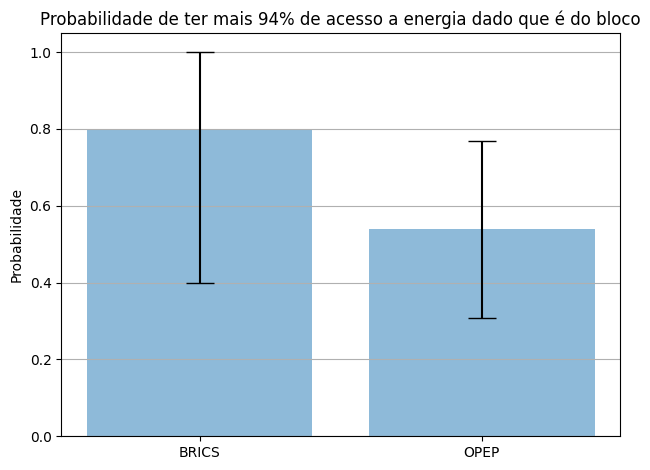

In [830]:

# Create lists for the plot
blocos = ['BRICS', 'OPEP']
x_pos = np.arange(len(blocos))
medias = [p_avan_brics, p_avan_opep]
error = [erro_inferior, erro_superior]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, medias, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Probabilidade')
ax.set_xticks(x_pos)
ax.set_xticklabels(blocos)
ax.set_title('Probabilidade de ter mais 94% de acesso a energia dado que é do bloco')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

Há sobreposição sim dos intervalos de confiança, entre 0.4 e 0.7692. 

4. Levando em consideração os intervalos de confiança, seria seguro dizer que países de um bloco são tipicamente mais “avançados” que os de outro bloco em relação ao indicador que você escolheu?

A partir dos da ánalise dos dados, percebe-se que há uma variação superior no grupo do BRICS, reflexo da pequena quantidade de países (e consequentemente da amostra), com uma faixa grande de sobreposição dos intervalos de confiança. Desse modo, apesar do BRICS apresentar valores médios superiores e, aparentemente  pode ser considerado mais "avançado" em relação ao indicador escolhido, essa afirmação deve ser feita com ressalvas, já que em a OPEP apresenta uma amostragem maior de dados e boa parte do intervalo de maior probabilidade dos blocos está contido nessa faixa de sobreposição.

Modificação feitas na entrega anterior:

1. Foram calculadas as probabilidades de ser do bloco sabendo que não é avançado, com alteração do classificador implementado.

#### Entrega:

Notebook exportado para PDF que é a continuação dos anteriores, contendo:

1. Uma figura mostrando P(avançado|bloco) para cada bloco econômico, incluindo seu intervalo de confiança.
2. Discussão: um texto de até 500 palavras explicando como esse intervalo indica se é seguro dizer que os países de um bloco são tipicamente mais “avançados” que os do outro bloco em relação ao indicador que você escolheu
3. Uma tabela indicando quais foram as modificações feitas na entrega anterior para contemplar o feedback que foi recebido.   

Lembre-se de entregar também seu dataset, isto é, deixe o repositório preparado para ser executado novamente!